In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
import numpy as np
import torch.optim

loss = 2834.356201171875


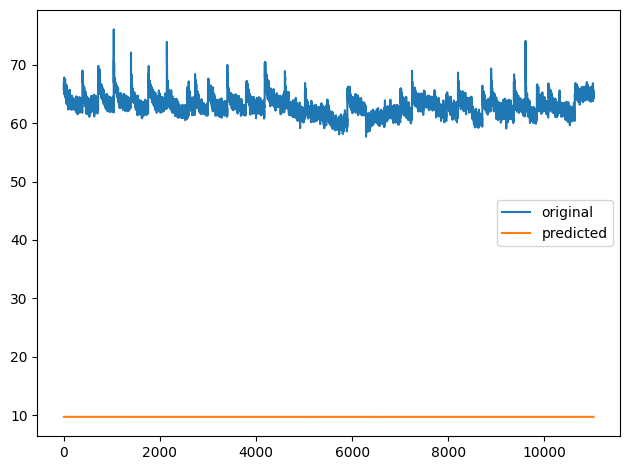

loss = 1102.841064453125


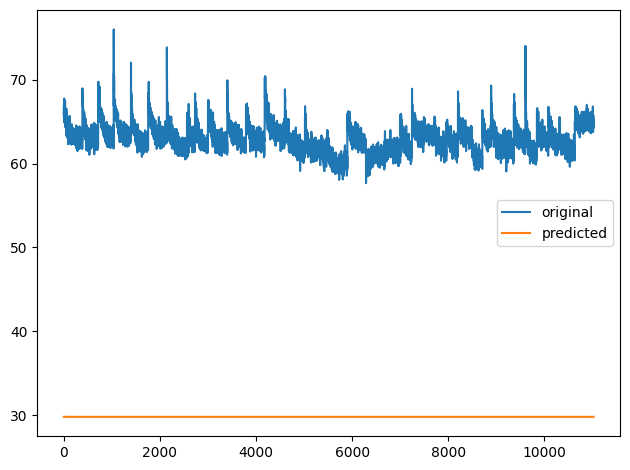

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
import numpy as np
import torch.optim


# ---------------- 准备数据 -------------------
data = pd.read_csv('data/3号机组抽水态健康样本.csv')  # 读取csv文件
data = np.array(data.iloc[:,1])  # 提取占有率
seq_l = 15  # 回溯及预测步长


# 构造 rnn 模型数据结构
def rnn_data(sequence, length):
    output_sequence = np.zeros([sequence.shape[0]-length, length, 1])  # [batch, seq, feature]
    output_y = np.zeros([sequence.shape[0]-length, 1])
    for i in range(sequence.shape[0] - length):
        output_sequence[i, :, 0] = sequence[i:(i+length)]
        output_y[i, 0] = sequence[i+length]
    return output_sequence, output_y


x, y = rnn_data(data, seq_l)
x_tensor = torch.tensor(x, dtype=torch.float)  # 转化为 torch.tensor 格式
y_tensor = torch.tensor(y, dtype=torch.float)


# ---------------- 搭建模型 -------------------
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, seq_l):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)  # lstm layer
        self.linear = nn.Linear(hidden_size * seq_l, output_size)  # linear layer

    def forward(self, x_in):
        x_in, _ = self.lstm(x_in)
        b, s, f = x_in.shape  # batch_size, sequence_length, feature_number
        x_in = x_in.reshape(b, s * f)
        x_in = self.linear(x_in)
        return x_in


# ---------------- 初始化、实例化 -------------------
net = LSTM(1, 3, 1, seq_l)  # 网络
loss_function = nn.MSELoss()  # 损失函数
optimizer = torch.optim.Adam(net.parameters())  # 优化器
epoch = 1000  # 最大迭代次数


# ---------------- 训练 -------------------
for i in range(epoch):
    optimizer.zero_grad()  # 梯度清零
    y_predict = net(x_tensor)  # 预测
    loss = loss_function(y_predict, y_tensor)  # 计算损失
    loss.backward()  # 损失回传，计算梯度
    optimizer.step()  # 根据梯度更新模型

 # 拟合曲线图
    if (i+1) % 500 == 0:
        print('loss =', loss.item())
        x_plot = x_tensor.detach().numpy()
        y_predict_plot = y_predict.detach().numpy()
        y_plot = y_tensor.detach().numpy()
        plt.clf()
        plt.plot(y_plot, label='original')
        plt.plot(y_predict_plot, label='predicted')
        plt.legend()
        plt.tight_layout()
        plt.pause(0.5)
        plt.ioff()

In [4]:
from sktime.libs.vmdpy import VMD

In [9]:
alpha = 1000  # 中等带宽约束
tau = 0.0  # 容忍噪声（不强制保真度）
K = 3 # 预期3个模式
DC = 0  # 不施加直流部分的约束
init = 1  # 统一初始化频域系数
tol = 1e-7

# 运行VMD算法
u, u_hat, omega = VMD(data.y, alpha, tau, K, DC, init, tol)

In [14]:
u[0]

array([ 6.12152353e-03,  6.38055954e-03,  6.72114753e-03,  7.26228297e-03,
        7.89529972e-03,  8.32741761e-03,  8.55553593e-03,  8.60418813e-03,
        8.40044069e-03,  7.93850689e-03,  7.43478888e-03,  7.15025387e-03,
        6.82824875e-03,  6.51895886e-03,  6.61291051e-03,  6.96433219e-03,
        6.91061440e-03,  7.06703549e-03,  7.36750844e-03,  7.48715801e-03,
        7.82324922e-03,  8.41646841e-03,  8.89124666e-03,  9.57505156e-03,
        1.05208512e-02,  1.14902038e-02,  1.26974645e-02,  1.36283783e-02,
        1.44024007e-02,  1.48532673e-02,  1.51684753e-02,  1.46755585e-02,
        1.37706545e-02,  1.26218389e-02,  1.14664504e-02,  1.02555844e-02,
        9.38087153e-03,  8.61323124e-03,  8.20996441e-03,  8.05722298e-03,
        7.90786752e-03,  7.62124445e-03,  7.14470481e-03,  6.56280772e-03,
        5.95318973e-03,  5.41206398e-03,  4.67548446e-03,  3.89321595e-03,
        3.36055008e-03,  2.66585608e-03,  2.14931969e-03,  1.94642848e-03,
        1.74294593e-03,  

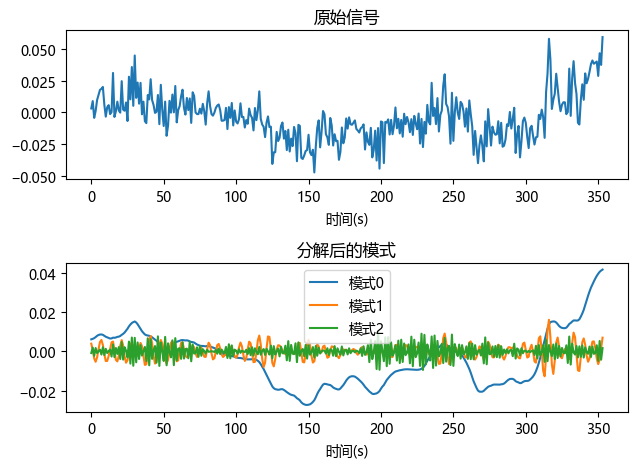

In [10]:
# 可视化分解后的模式
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(data.y)
plt.title("原始信号")
plt.xlabel("时间(s)")
plt.subplot(2, 1, 2)
plt.plot(u.T)
plt.title("分解后的模式")
plt.xlabel("时间(s)")
plt.legend([f"模式{m_i}" for m_i in range(u.shape[0])])
plt.tight_layout()

loss = 1.1498106687213294e-05


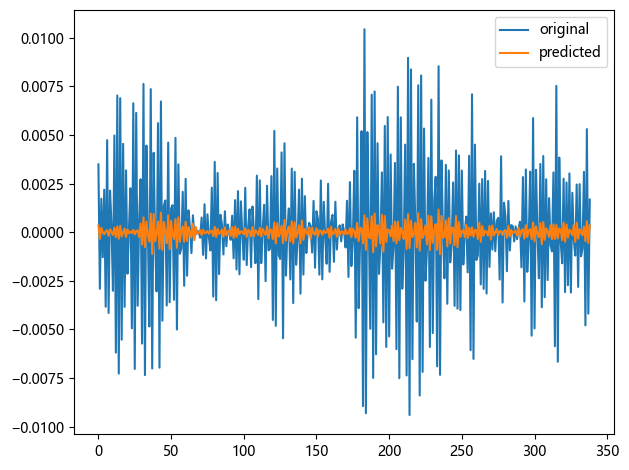

loss = 3.651337692645029e-06


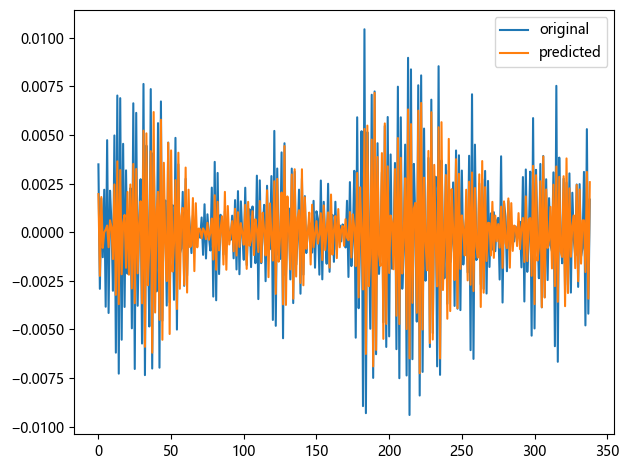

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
import numpy as np
import torch.optim


# ---------------- 准备数据 -------------------

data = u[2]  # 提取占有率
seq_l = 15  # 回溯及预测步长


# 构造 rnn 模型数据结构
def rnn_data(sequence, length):
    output_sequence = np.zeros([sequence.shape[0]-length, length, 1])  # [batch, seq, feature]
    output_y = np.zeros([sequence.shape[0]-length, 1])
    for i in range(sequence.shape[0] - length):
        output_sequence[i, :, 0] = sequence[i:(i+length)]
        output_y[i, 0] = sequence[i+length]
    return output_sequence, output_y


x, y = rnn_data(data, seq_l)
x_tensor = torch.tensor(x, dtype=torch.float)  # 转化为 torch.tensor 格式
y_tensor = torch.tensor(y, dtype=torch.float)


# ---------------- 搭建模型 -------------------
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, seq_l):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)  # lstm layer
        self.linear = nn.Linear(hidden_size * seq_l, output_size)  # linear layer

    def forward(self, x_in):
        x_in, _ = self.lstm(x_in)
        b, s, f = x_in.shape  # batch_size, sequence_length, feature_number
        x_in = x_in.reshape(b, s * f)
        x_in = self.linear(x_in)
        return x_in


# ---------------- 初始化、实例化 -------------------
net = LSTM(1, 12, 1, seq_l)  # 网络
loss_function = nn.MSELoss()  # 损失函数
optimizer = torch.optim.Adam(net.parameters())  # 优化器
epoch = 1000  # 最大迭代次数


# ---------------- 训练 -------------------
for i in range(epoch):
    optimizer.zero_grad()  # 梯度清零
    y_predict = net(x_tensor)  # 预测
    loss = loss_function(y_predict, y_tensor)  # 计算损失
    loss.backward()  # 损失回传，计算梯度
    optimizer.step()  # 根据梯度更新模型

 # 拟合曲线图
    if (i+1) % 500 == 0:
        print('loss =', loss.item())
        x_plot = x_tensor.detach().numpy()
        y_predict_plot = y_predict.detach().numpy()
        y_plot = y_tensor.detach().numpy()
        plt.clf()
        plt.plot(y_plot, label='original')
        plt.plot(y_predict_plot, label='predicted')
        plt.legend()
        plt.tight_layout()
        plt.pause(0.5)
        plt.ioff()

In [21]:
y3 = y_predict

In [19]:
y2 = y_predict

In [17]:
y1= y_predict

In [29]:
data = pd.read_csv("deterlist_modelid_1.csv").y

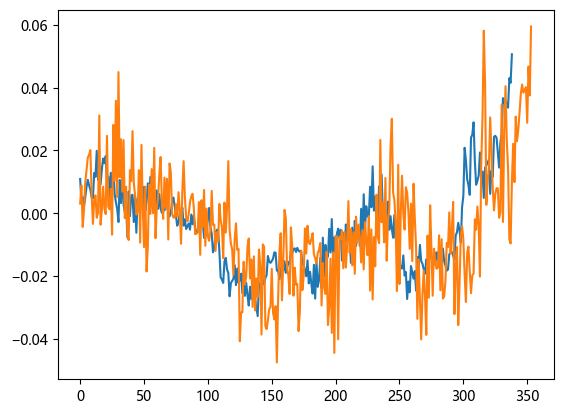

In [32]:
plt.plot((y1+y2+y3).detach().numpy())
plt.plot(data)
plt.show()

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error as mse

In [ ]:
data = pd.read_csv("data/3号机组发电态健康样本.csv",encoding='GBK')
data

In [9]:
data.describe()

,时间戳,上导摆度X,上导摆度Y,下导摆度X,下导摆度Y,水导摆度X,水导摆度Y,上机架x振动,上机架y振动,下机架x振动,...,顶盖y,有功功率,无功功率,励磁电流,励磁电压,上导轴承出油边.最高温度,下导轴瓦进油边.最高温度,水导瓦温.最高温度,导叶开度,水头
count,8.996000e+03,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,...,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000
mean,1.517778e+09,60.611266,61.987784,103.286122,101.863939,96.389151,95.828616,5.588213,4.204279,4.417286,...,13.091501,374.045852,33.630270,1454.721321,272.362256,47.824250,60.269641,51.491247,86.032922,465.542965
std,7.463572e+05,4.606981,3.777137,11.902937,11.827822,6.966841,6.413415,0.332230,1.122470,0.656586,...,1.993063,2.053903,16.024927,67.225461,31.271828,1.743868,2.136298,1.983887,2.770059,6.144335
min,1.516408e+09,55.187634,56.999256,87.874790,87.500720,73.498990,73.060326,4.525000,2.012000,3.125000,...,7.975000,350.234400,-46.990120,473.965360,153.623030,33.980076,40.149990,35.050175,73.225075,449.719940
25%,1.517213e+09,58.354509,60.126213,96.109457,94.656013,91.751953,91.969391,5.362000,3.187000,3.928000,...,11.588000,373.758488,34.089776,1453.035725,250.456005,47.933331,60.128678,51.133347,84.109350,461.077360
50%,1.517733e+09,59.563545,61.343661,99.468237,97.935643,96.449160,96.282350,5.569000,3.733500,4.263000,...,12.837000,374.173300,38.624984,1476.404800,275.937055,48.416625,61.062882,51.533363,85.743710,466.045015
75%,1.518484e+09,61.077004,62.609134,106.001794,104.624330,101.439129,100.437207,5.800000,5.308250,4.800000,...,14.325000,374.718563,42.566921,1488.239400,297.309210,48.600082,61.309275,52.421194,87.984569,470.109975
max,1.519051e+09,123.780700,118.281720,190.720890,188.031280,116.688310,113.344800,7.812000,7.263000,7.675000,...,21.088000,381.397860,63.013184,1616.563200,350.257540,48.999966,61.862427,57.044476,94.450100,477.960140


In [24]:
def modeling_workflow(dy,dx,):
    from sklearn.preprocessing import MinMaxScaler
    y=dy
    X=dx
    sc = MinMaxScaler()
    sc2 = MinMaxScaler()
    y=sc.fit_transform(np.array(y).reshape(-1, 1))
    X=sc2.fit_transform(X)
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)
    lgbmr_model = LGBMRegressor(
        colsample_bytree=0.7,
        learning_rate=0.055,
        min_child_samples=10,
        num_leaves=15,
        objective='regression',
        n_estimators=1000,
        n_jobs=5,
        random_state=337)
    lgbmr_model.fit(x_train, y_train)
    lgbmr_pred = lgbmr_model.predict(x_test)
    print(mse(sc.inverse_transform(y_test),sc.inverse_transform(lgbmr_model.predict(x_test).reshape(-1,1))))
    return sc.inverse_transform(lgbmr_pred.reshape(-1,1))

In [12]:
data.iloc[:,1:5]

,上导摆度X,上导摆度Y,下导摆度X,下导摆度Y
0,72.092896,69.250150,121.312530,120.152580
1,69.396250,68.500100,122.353900,120.084340
2,70.112960,68.500630,120.523920,120.062680
3,68.281494,67.561540,115.499810,115.280180
4,67.563500,67.876160,115.064354,116.688950
...,...,...,...,...
8991,59.468224,60.718746,95.687100,89.812410
8992,58.749382,60.812958,96.156364,91.125656
8993,59.250076,60.468437,93.344696,92.750110
8994,58.562520,59.937650,93.343400,92.094124


In [25]:
data =  pd.read_csv("data/3号机组发电态健康样本.csv",encoding='GBK')
prd = []
for i in range(1,5): prd.append(modeling_workflow(data.iloc[:,i],data.iloc[:,13:]))

d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 6297, number of used features: 9
[LightGBM] [Info] Start training from score 0.078607
1.4388998114888258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 6297, number of used features: 9
[LightGBM] [Info] Start training from score 0.081003


d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.3447451990000423
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 6297, number of used features: 9
[LightGBM] [Info] Start training from score 0.149081


d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5.222266195600832
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 6297, number of used features: 9
[LightGBM] [Info] Start training from score 0.142254


d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4.329867054196047


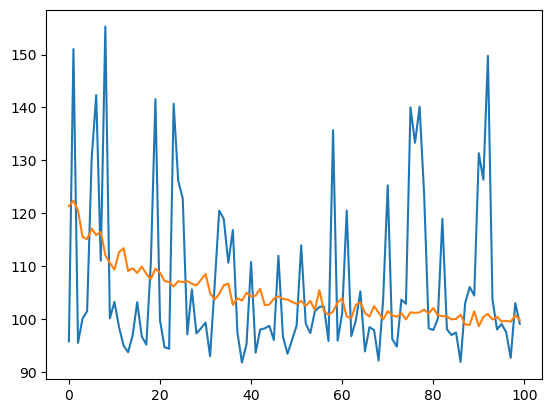

In [34]:
plt.plot(prd[2][:100])
plt.plot(data.iloc[:100,3])

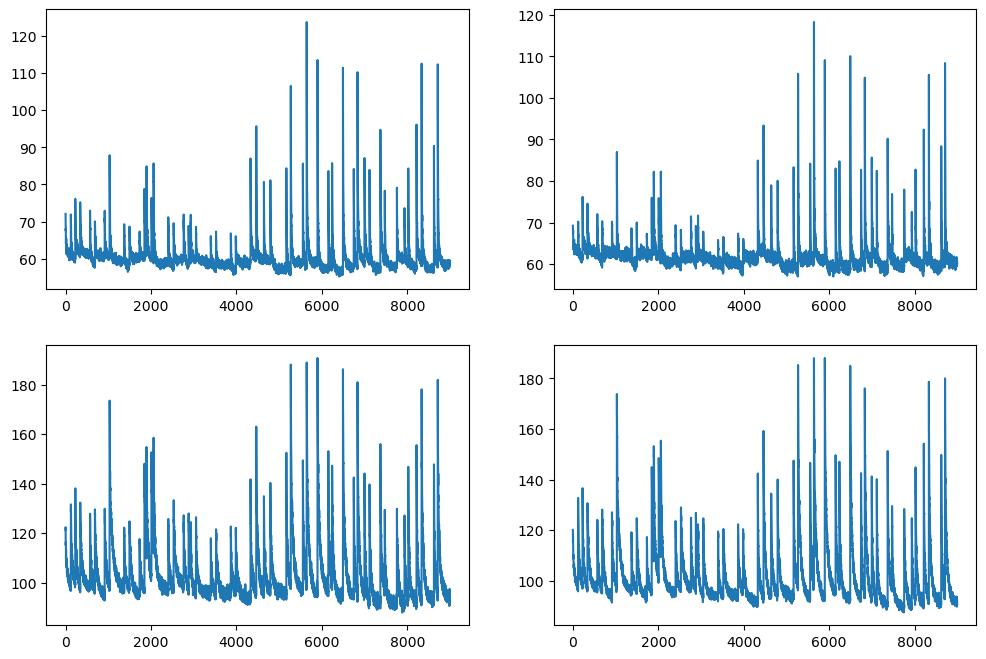

In [54]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(data.iloc[:,1])
plt.subplot(2,2,2)
plt.plot(data.iloc[:,2])
plt.subplot(2,2,3)
plt.plot(data.iloc[:,3])
plt.subplot(2,2,4)
plt.plot(data.iloc[:,4])

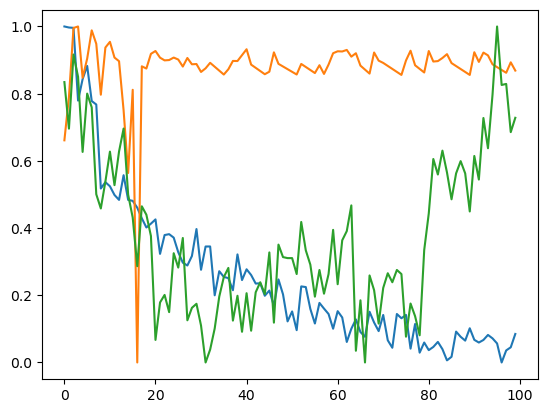

In [63]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
plt.plot(sc.fit_transform(np.array(data.iloc[:100,4]).reshape(-1,1)))
plt.plot(sc.fit_transform(np.array(data.iloc[:100,13]).reshape(-1,1)))
plt.plot(sc.fit_transform(np.array(data.iloc[:100,14]).reshape(-1,1)))

In [47]:
data = pd.read_csv("data/3号机组发电态健康样本.csv",encoding='GBK')
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc2 = MinMaxScaler()
y=sc.fit_transform(np.array(data.iloc[:,1]).reshape(-1, 1))
X=sc2.fit_transform(data.iloc[:,13:])
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

In [48]:
lgbmr_model = LGBMRegressor(
        colsample_bytree=0.7,
        learning_rate=0.055,
        min_child_samples=10,
        num_leaves=15,
        objective='regression',
        n_estimators=1000,
        n_jobs=5,
        random_state=337)
 
lgbmr_model.fit(x_train, y_train)
lgbmr_pred = lgbmr_model.predict(x_test).tolist()

d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 6297, number of used features: 9
[LightGBM] [Info] Start training from score 0.078607


In [49]:
mse(sc.inverse_transform(y_test),sc.inverse_transform(lgbmr_model.predict(x_test).reshape(-1,1)))

1.4388998114888258

In [46]:
mse(y_test,lgbmr_model.predict(x_test))

0.00042842850486710554

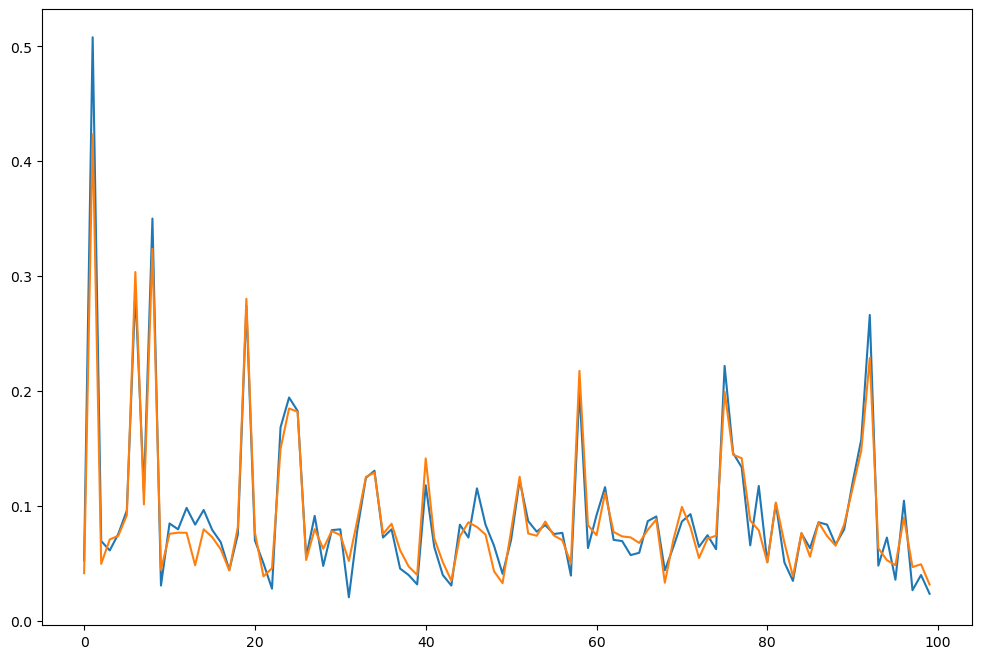

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(list(y_test)[:100])
plt.plot(lgbmr_model.predict(x_test)[:100])

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [13]:
enet_model = ElasticNet()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # 正则化强度
    'l1_ratio': [0.2, 0.5, 0.8]  # L1与L2正则化的混合比例，0为L2正则化，1为L1正则化
}

grid_search = GridSearchCV(enet_model, param_grid, cv=5, return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0.2, 0.5, 0.8]},
             return_train_score=True)

In [15]:
mse(sc.inverse_transform(y_test),sc.inverse_transform(grid_search.predict(x_test).reshape(-1,1)))

3.4454559315532176

In [ ]:
lgbmr_model = LGBMRegressor()
param_grid = {
    'max_depth': [4,6,8],
    'num_leaves': [20,30,40],
    'min_child_samples': [18,19,20,21,22],
    'min_child_weight': [0.001,0.002],
}

grid_search = GridSearchCV(lgbmr_model, param_grid, cv=5, return_train_score=True)
grid_search.fit(x_train, y_train)

In [19]:
mse(sc.inverse_transform(y_test),sc.inverse_transform(grid_search.predict(x_test).reshape(-1,1)))

1.3647000166067966

In [ ]:
boost = lgbmr_model.booster_
pd.DataFrame({
'column': data.columns[13:],
'importance': boost.feature_importance(),
}).sort_values(by='importance')

In [3]:
import torch
from torch.utils.data import DataLoader,TensorDataset
from torchvision import transforms
import pandas as pd

import matplotlib.pyplot as plt
import time
import numpy as np
from torch import nn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [96]:
train_dataset = TensorDataset(torch.tensor(np.array(x_train),dtype=torch.float32), torch.tensor(np.array(y_train),dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(torch.tensor(np.array(x_test),dtype=torch.float32), torch.tensor(np.array(y_test),dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

train_data = train_loader
test_data = test_loader

In [115]:
'''训练部分'''
import torch.optim as optim
 
feature_number = X.columns.__len__()  # 设置特征数目
out_prediction = 1  # 设置输出数目
learning_rate = 0.01  # 设置学习率
epochs = 100  # 设置训练代数

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_output, n_neuron1, n_neuron2,n_layer):  # n_feature为特征数目，这个数字不能随便取,n_output为特征对应的输出数目，也不能随便取
        self.n_feature=n_feature
        self.n_output=n_output
        self.n_neuron1=n_neuron1
        self.n_neuron2=n_neuron2
        self.n_layer=n_layer
        super(Net, self).__init__()
        self.input_layer = nn.Linear(self.n_feature, self.n_neuron1) # 输入层
        self.hidden1 = nn.Linear(self.n_neuron1, self.n_neuron2) # 1类隐藏层    
        self.hidden2 = nn.Linear(self.n_neuron2, self.n_neuron2) # 2类隐藏
        self.predict = nn.Linear(self.n_neuron2, self.n_output) # 输出层
 
    def forward(self, x):
        '''定义前向传递过程'''
        out = self.input_layer(x)
        out = torch.relu(out) # 使用relu函数非线性激活
        out = self.hidden1(out)
        out = torch.relu(out)
        for i in range(self.n_layer):
            out = self.hidden2(out)
            out = torch.relu(out) 
        out = self.predict( # 回归问题最后一层不需要激活函数
            out
        )  # 除去feature_number与out_prediction不能随便取，隐藏层数与其他神经元数目均可以适当调整以得到最佳预测效果
        return out
 
net = Net(n_feature=feature_number,
                      n_output=out_prediction,
                      n_layer=1,
                      n_neuron1=16,
                      n_neuron2=8) # 这里直接确定了隐藏层数目以及神经元数目，实际操作中需要遍历
optimizer = optim.Adam(net.parameters(), learning_rate)  # 使用Adam算法更新参数
criteon = torch.nn.MSELoss()  # 误差计算公式，回归问题采用均方误差

for epoch in range(epochs):  # 整个数据集迭代次数
    net.train() # 启动训练模式
    start_time = time.time()
    for batch_idx, (data, target) in enumerate(train_data):
        logits = net.forward(data)  # 前向计算结果(预测结果）
        loss = criteon(logits, target)  # 计算损失
        optimizer.zero_grad()  # 梯度清零
        loss.backward()  # 后向传递过程
        optimizer.step()  # 优化权重与偏差矩阵
    end_time = time.time()
    print("epoch",epoch,' ',"Traintime :", end_time - start_time)
       
    logit = []  # 这个是验证集，可以根据验证集的结果进行调参，这里根据验证集的结果选取最优的神经网络层数与神经元数目
    target = []
    net.eval() # 启动测试模式
    for data, targets in test_data:  # 输出验证集的平均误差
        logits = net.forward(data).detach().numpy()
        targets=targets.detach().numpy()
        target.append(targets[0])
        logit.append(logits[0])
    average_loss =  criteon(torch.tensor(logit), torch.tensor(target))

d:\anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([85])) that is different to the input size (torch.Size([85, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduct

epoch 0   Traintime : 0.40459752082824707
epoch 1   Traintime : 0.4284365177154541
epoch 2   Traintime : 0.43885159492492676
epoch 3   Traintime : 0.37673521041870117
epoch 4   Traintime : 0.34664344787597656
epoch 5   Traintime : 0.36279916763305664
epoch 6   Traintime : 0.3477625846862793
epoch 7   Traintime : 0.3614234924316406
epoch 8   Traintime : 0.37946367263793945
epoch 9   Traintime : 0.36718082427978516
epoch 10   Traintime : 0.36335110664367676
epoch 11   Traintime : 0.36161255836486816
epoch 12   Traintime : 0.37810635566711426
epoch 13   Traintime : 0.3596830368041992
epoch 14   Traintime : 0.3866994380950928
epoch 15   Traintime : 0.38502955436706543
epoch 16   Traintime : 0.3700428009033203
epoch 17   Traintime : 0.3821680545806885
epoch 18   Traintime : 0.4057028293609619
epoch 19   Traintime : 0.3849186897277832
epoch 20   Traintime : 0.36906981468200684
epoch 21   Traintime : 0.4042191505432129
epoch 22   Traintime : 0.3806476593017578
epoch 23   Traintime : 0.3861284

In [116]:
average_loss

tensor(37.9307)

In [117]:
mse(net.forward(torch.tensor(np.array(x_test),dtype=torch.float32)).detach().numpy(),y_test)

16.690169615000514

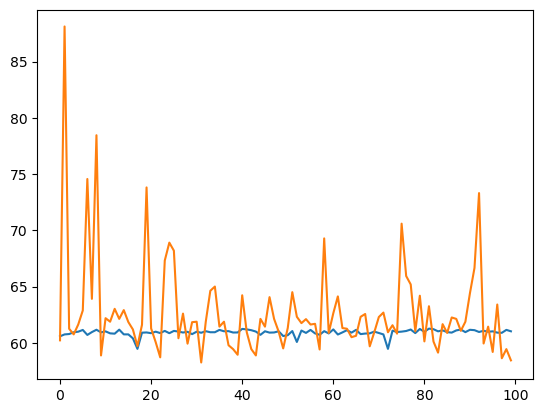

In [118]:
plt.plot(net.forward(torch.tensor(np.array(x_test),dtype=torch.float32)).detach().numpy()[:100])
plt.plot(list(y_test)[:100])

In [12]:
x_train.shape

(6297, 9)

In [36]:
np.array(data.iloc[:,13:]).reshape(-1, 1)

array([[ 368.31128 ],
       [  50.134953],
       [1496.4124  ],
       ...,
       [  52.41112 ],
       [  91.38736 ],
       [ 452.45013 ]])

In [4]:
data = pd.read_csv("data/3号机组发电态健康样本.csv",encoding='GBK')
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc2 = MinMaxScaler()
y=sc.fit_transform(np.array(data.iloc[:,4]).reshape(-1, 1))
X=sc2.fit_transform(data.iloc[:,13:])
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

In [38]:
from tensorflow.keras.layers import Dense
data_input = keras.layers.Input(shape=(9,), name='train_input')
# layer1 = Dense(256, activation='relu')(data_input)
layer1 = Dense(128,activation='relu')(data_input)
# layer1 = Dropout(0.2)(layer1)
# layer1 = Dense(64, activation='relu')(data_input)
layer1 = keras.layers.Dropout(0.2)(layer1)
layer1 = Dense(64, activation='relu')(layer1)
layer1 = Dense(32, activation='relu')(layer1)
# layer1 = Dense(32,activation='relu')(data_input)
# layer1 = Dropout(0.2)(layer1)
layer1 = Dense(16, activation='relu')(layer1)
layer1 = Dense(8, activation='relu')(layer1)
layer1 = Dense(4, activation='relu')(layer1)
layer1 = Dense(2, activation='relu')(layer1)
data_output = Dense(1, activation='linear')(layer1)
model1 = keras.Model(inputs=data_input, outputs=data_output)
model1.compile(loss='mse', optimizer='rmsprop')

In [50]:
mse(sc.inverse_transform(y_test),sc.inverse_transform(model1.predict(x_test)))

85/85 [==============================] - 0s 1ms/step


2.599553830667455

85/85 [==============================] - 0s 1ms/step


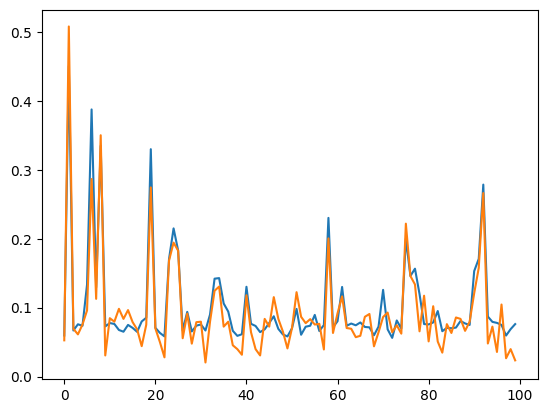

In [41]:
plt.plot(model1.predict(x_test)[:100])
plt.plot(list(y_test)[:100])

In [40]:
model1.fit(x=x_train, y=y_train, epochs=100)

Epoch 1/100
197/197 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 2/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 3/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 4/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 5/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 6/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 7/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 10/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11/100
197/197 [==============================] - 0s 2ms/step - loss: 9.8234e-04
Epoch 12/100
197/197 [==============================] - 0s 2ms/step - loss: 9.7612e-04
Epoch

In [5]:
model = keras.models.Sequential([
    keras.layers.Input(shape=9),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(1,activation="linear")
])
model.compile(loss="mean_squared_error",optimizer="Adam")
history = model.fit(x_train,y_train,epochs=50)

Epoch 1/50
197/197 [==============================] - 2s 2ms/step - loss: 0.0071
Epoch 2/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 3/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 6/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 8/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 9/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 10/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 11/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 12/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 13/50
197/197 [====

85/85 [==============================] - 0s 1ms/step


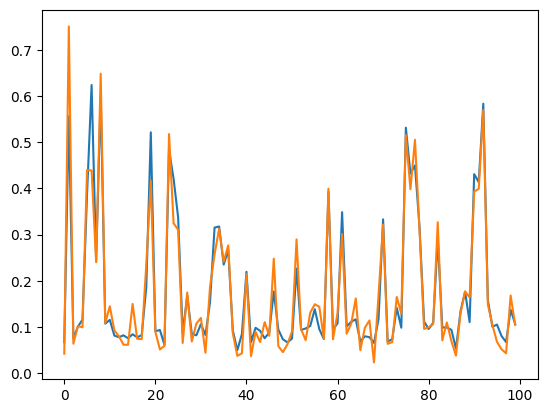

In [6]:
plt.plot(model.predict(x_test)[:100])
plt.plot(list(y_test)[:100])

In [7]:
from sklearn.metrics import mean_squared_error as mse

In [8]:
mse(sc.inverse_transform(y_test),sc.inverse_transform(model.predict(x_test)))

85/85 [==============================] - 0s 1ms/step


9.659237545234374

In [1]:
pumppower_list = [[826, 822], [2740, 2736], [4654, 4650], [6568, 6564]]
# 四个机组输入输出id列表
inputlist = [[346, 347, 4597, 4, 5, 22, 603, 617, 638, 155, 157, 434],
                [1058, 1059, 4597, 716, 717, 734, 1315, 741, 1348, 867, 869, 1146],
                [1770, 1771, 4597, 1428, 1429, 1446, 2027, 1453, 2060, 1579, 1581, 1858],
                [2482, 2483, 4597, 2140, 2141, 2158, 2739, 2753, 2774, 2291, 2293, 2570]]
outputlist = [[92, 96, 93, 97, 94, 98, 100, 104, 103, 101, 105, 107, 102, 106, 99],
                [804, 808, 805, 809, 806, 810, 812, 816, 815, 813, 817, 819, 814, 818, 811],
                [1516, 1520, 1517, 1521, 1518, 1522, 1524, 1528, 1527, 1525, 1529, 1531, 1526, 1530, 1523],
                [2228, 2232, 2229, 2233, 2230, 2234, 2236, 2240, 2239, 2237, 2241, 2243, 2238, 2242, 2235]]

In [3]:
inputlist[2]

[1770, 1771, 4597, 1428, 1429, 1446, 2027, 1453, 2060, 1579, 1581, 1858]

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("data/point_temp_float.csv")

In [10]:
data.loc[data.id==inputlist[0][1],:]

,time,id,value,create_time
35559,1592236986,347,5,22/1/2024 13:36:23
58241,1592237109,347,8,22/1/2024 13:36:24
58623,1592237111,347,5,22/1/2024 13:36:24
59970,1592237118,347,1,22/1/2024 13:36:24
60756,1592237122,347,5,22/1/2024 13:36:24
...,...,...,...,...
15081362,1592326469,347,63,22/1/2024 13:37:50
15083341,1592326479,347,63,22/1/2024 13:37:50
15098862,1592326567,347,66,22/1/2024 13:37:50
15099224,1592326569,347,65,22/1/2024 13:37:50


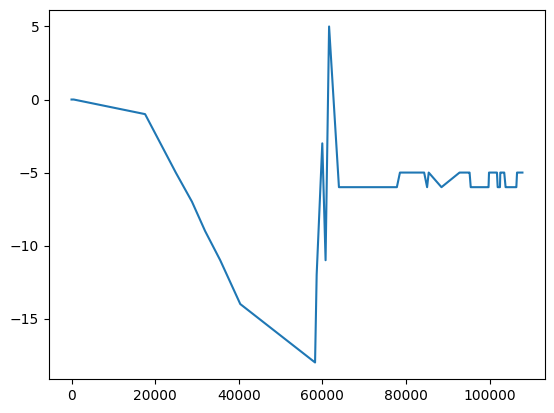

In [17]:
plt.plot(data.loc[data.id==inputlist[0][0],:].value[:100])

In [ ]:
inputs = [data for i in inputlist[2]]

In [7]:
data.id.value_counts()

4402    172741
4061    172741
346     127632
72       90593
60       88573
         ...  
2562       295
2567       295
2570       104
1059        28
1058        26
Name: id, Length: 862, dtype: int64

In [8]:
data.loc[data.id==346,:]

,time,id,value,create_time
0,1592236800,346,0,29/4/2024 16:42:06.596
212,1592236801,346,0,29/4/2024 16:42:06.596
501,1592236802,346,0,29/4/2024 16:42:06.596
532,1592236803,346,0,29/4/2024 16:42:06.596
17592,1592236893,346,-1,22/1/2024 13:35:07
...,...,...,...,...
18480314,1592409536,346,-6,29/4/2024 16:43:20.725
18480350,1592409537,346,-6,29/4/2024 16:43:20.725
18480418,1592409538,346,-6,29/4/2024 16:43:20.725
18480476,1592409539,346,-6,29/4/2024 16:43:20.725


In [20]:
healthy_data = pd.read_csv("data/3号机组抽水态健康样本.csv",encoding="GBK")
deter_data = pd.read_csv("data/3号机组抽水态劣化样本.csv",encoding="GBK")

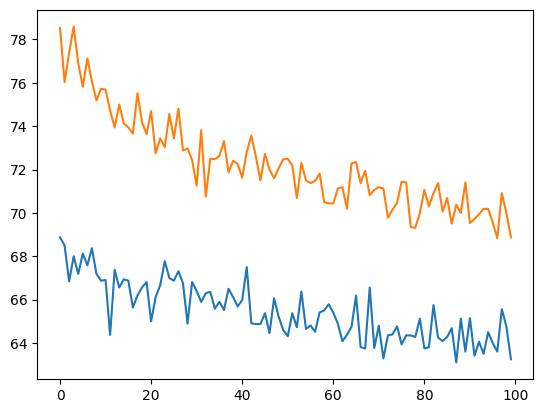

In [ ]:
plt.plot(healthy_data.iloc[:100,1])
plt.plot(deter_data.iloc[:100,1])

In [82]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
np.array(healthy_data.iloc[:400,1]).reshape(-1, 1)

(400, 1)

In [83]:
model = RandomForestRegressor()
model.fit(np.array(healthy_data.iloc[:400,1]).reshape(-1, 1),np.array(deter_data.iloc[:400,1]))

RandomForestRegressor()

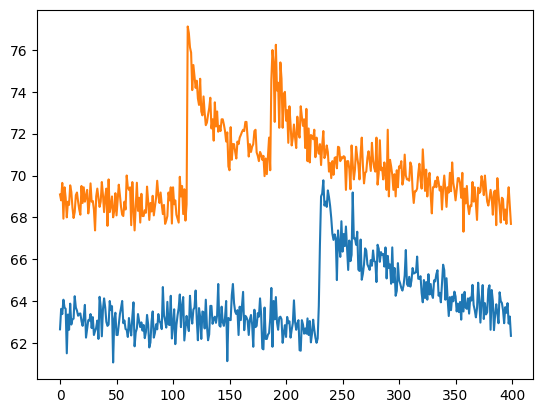

In [62]:
plt.plot(list(healthy_data.iloc[500:900,1]))
plt.plot(list(deter_data.iloc[500:900,1]))

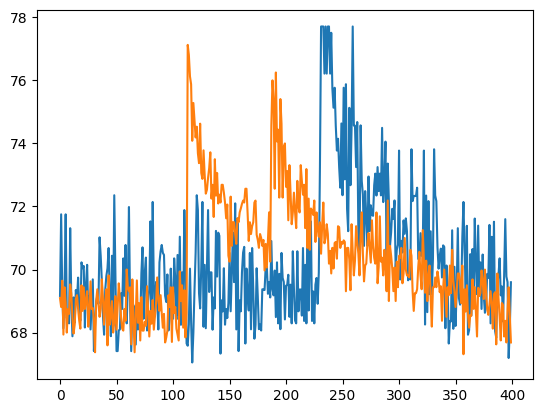

In [88]:
plt.plot(model.predict(np.array(healthy_data.iloc[500:900,1]).reshape(-1, 1)))
plt.plot(list(deter_data.iloc[500:900,1]))